In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import metrics, tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree
from scipy.cluster import hierarchy
from six import StringIO
from IPython.display import Image
import pydotplus

## Download data

In [2]:
# Get the current working directory
directory = os.getcwd()

# Load data
directory_data = directory + '\\Data\\sfo 2018_data file_final_Weighted.xlsx'
data_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='DATA')
code_list_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='Code List')

## Get to know data

In [3]:
data_2018.head()

,RESPNUM,CCGID,RUNID,INTDATE,DAY,GATE,BAREA,STRATA,PEAK,METH,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,552,21,2,102,G,3,3,1,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,552,21,2,102,G,3,3,1,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,552,21,2,102,G,3,3,1,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,552,21,2,102,G,3,3,1,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,552,21,2,102,G,3,3,1,...,15,2,2,2,2,2,2,2,1,0.670484


In [4]:
data_2018.describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,...,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,1821.937700,1419.065504,14.079032,4.127447,50.647205,2.148095,2.161979,1.012460,1.880384,1414.961552,...,18.608046,1.657529,4.045568,1.448558,2.046992,1.817017,1.595586,1.541118,1.103596,0.999999
std,942.654669,861.370970,8.193408,1.692994,33.241023,0.780914,0.750427,0.125978,0.324569,1714.986966,...,26.604692,0.730039,1.864170,0.611737,1.493790,0.700515,0.678995,0.697855,0.442109,0.490976
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038
25%,1052.000000,707.000000,8.000000,3.000000,12.000000,2.000000,2.000000,1.000000,2.000000,394.000000,...,7.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.670484
50%,1869.000000,1409.000000,15.000000,4.000000,52.000000,2.000000,2.000000,1.000000,2.000000,857.000000,...,10.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.061139
75%,2594.000000,2116.000000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1747.000000,...,14.000000,2.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,99.000000,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528


In [5]:
data_2018.columns

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'ARRTIME',
       'DEPTIME', 'HOWLONG', 'Q2PURP1', 'Q2PURP2', 'Q2PURP3', 'Q3GETTO1',
       'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q4BAGS', 'Q4STORE', 'Q4FOOD',
       'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD',
       'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP',
       'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL',
       'Q7ALL', 'Q8-1', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9Boarding',
       'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q9-1',
       'Q9-2', 'Q9-3', 'Q10Safe', 'Q10-1', 'Q10-2', 'Q10-3', 'Q11TSAPRE',
       'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q13COUNTY', 'Q13GETRATE',
       'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q15A', 'Q15-1', 'Q15-2',
       'Q15-3', 'N

In [6]:
data_2018.rename(columns = {'NETPRO  ':'NETPRO'}, inplace = True)
data_2018.rename(columns = {'Q14FIND ':'Q14FIND'}, inplace = True)

### Null variables

In [7]:
# Variable with null
columns_null = ['Q2PURP2', 'Q2PURP3', 'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18CITY', 'Q18COUNTY', 'Q18ZIP', 'Q18STATE', 'Q18COUNTRY']
data_2018.isnull().sum()

RESPNUM    0
CCGID      0
RUNID      0
INTDATE    0
DAY        0
          ..
Q23FLY     0
Q24SJC     0
Q24OAK     0
LANG       0
WEIGHT     0
Length: 100, dtype: int64

In [8]:
# Variable with hidden null as 0
columns_0 = ['Q2PURP1', 'Q4BAGS', 'Q4STORE', 'Q4FOOD', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q10-1', 'Q11TSAPRE', 'Q13GETRATE', 'Q14FIND', 'Q14PASSTHRU', 'Q15PROBLEM',  'Q17LIVE', 'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24SJC', 'Q24OAK']
# Variable with hidden null as 11 - 'NETPRO'
# Variable with hidden null as 99 - 'HOME'
# Variable with hidden null as BLANK - 'Q7ALL'
# Variable with hidden null as N - 'HOWLONG', 'ARRTIME', 'DEPTIME'
print(pd.unique(data_2018['Q24OAK']))

[2 1 0 3]


In [9]:
data_2018.loc[data_2018['Q7ALL'] == 'BLANK', 'Q7ALL'] = 0
data_2018.loc[data_2018['HOWLONG'] == 'N', 'HOWLONG'] = 0
data_2018.loc[data_2018['ARRTIME'] == 'N', 'ARRTIME'] = 0
data_2018.loc[data_2018['DEPTIME'] == 'N', 'DEPTIME'] = 0
columns_0.extend(['Q7ALL', 'HOWLONG', 'ARRTIME', 'DEPTIME'])

In [10]:
# Columns without null values
columns_not_null = data_2018.columns.copy().drop(columns_null + columns_0 + ['NETPRO', 'HOME'])
columns_not_null

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'Q3GETTO1', 'Q9-1',
       'Q13COUNTY', 'LANG', 'WEIGHT'],
      dtype='object')

In [11]:
# Number of records after dropping all hidden null records
data_2018_not_null = data_2018.copy()
for col in columns_0:
    data_2018_not_null = data_2018_not_null.loc[data_2018_not_null[col] != 0]
data_2018_not_null = data_2018_not_null.loc[data_2018_not_null['NETPRO'] != 11]
data_2018_not_null = data_2018_not_null.loc[data_2018_not_null['HOME'] != 99]
len(data_2018_not_null)

388

### New variable - Q7MEAN

In [12]:
# data_2018['Q7MEAN'] = data_2018.loc[:, ['Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL']].mean(axis=1)

In [13]:
# data_2018 = data_2018.astype({'Q7MEAN': 'int64'})
# data_2018 = data_2018.astype({'Q7ALL': 'int64'})
# data_2018['Q7MEAN'].corr(data_2018['Q7ALL'])

### Data types

In [14]:
data_2018.dtypes

RESPNUM      int64
CCGID        int64
RUNID       object
INTDATE      int64
DAY          int64
            ...   
Q23FLY       int64
Q24SJC       int64
Q24OAK       int64
LANG         int64
WEIGHT     float64
Length: 100, dtype: object

In [15]:
data_2018 = data_2018.astype({'HOWLONG': 'float64'})

In [16]:
data_2018_object = data_2018.select_dtypes(include=['object'])
columns_object = data_2018_object.columns
data_2018_object.head()

,RUNID,BAREA,AIRLINE,DESTINATION,ARRTIME,DEPTIME,Q7ALL,Q8-5,Q15A,Q18CITY,Q18COUNTY,Q18STATE,Q18COUNTRY
0,552,G,TURKISH AIRLINES,ISTANBUL,14:00:00,18:15:00,4,NaN,NaN,NaN,NaN,NaN,CYPRUS
1,552,G,TURKISH AIRLINES,ISTANBUL,13:00:00,18:15:00,4,NaN,NaN,ISTANBUL,NaN,NaN,TURKEY
2,552,G,TURKISH AIRLINES,ISTANBUL,15:30:00,18:15:00,4,NaN,NaN,IZMIR,NaN,NaN,TURKEY
3,552,G,TURKISH AIRLINES,ISTANBUL,14:30:00,18:15:00,4,NaN,NaN,SKOPJE,NaN,NaN,MACEDONIA
4,552,G,TURKISH AIRLINES,ISTANBUL,15:20:00,18:15:00,0,NaN,I FLEW WITH TK A NUMBER OF TIMES AND NEVER ENC...,REUTLINGEN,NaN,NaN,GERMANY


In [17]:
data_2018_numeric = data_2018.select_dtypes(include=['int64', 'float64'])
columns_numeric = data_2018_numeric.columns
data_2018_numeric.head()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,21,2,102,3,3,1,2,80,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,21,2,102,3,3,1,2,80,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,21,2,102,3,3,1,1,80,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,21,2,102,3,3,1,1,80,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,21,2,102,3,3,1,2,80,...,15,2,2,2,2,2,2,2,1,0.670484


### Correlation

In [18]:
columns_numeric_nn = np.setdiff1d(columns_numeric, columns_null)
for i in range(0, len(columns_numeric_nn) - 1):
    for j in range(i + 1, len(columns_numeric_nn)):
        corr = data_2018[columns_numeric_nn[i]].corr(data_2018[columns_numeric_nn[j]])
        if corr > 0.7 or corr < -0.7: print(f'Correlation value {corr} between {columns_numeric_nn[i]} and {columns_numeric_nn[j]}')

Correlation value 0.7563448110220641 between DESTGEO and PEAK
Correlation value 0.7215915509820979 between Q7AIRTRAIN and Q7LTPARKING
Correlation value 0.7493259544417019 between Q7AIRTRAIN and Q7RENTAL
Correlation value 0.8842590853660252 between Q7INFODOWN and Q7INFOUP
Correlation value 0.790833628270625 between Q7LTPARKING and Q7PARK
Correlation value 0.7454482099313208 between Q7LTPARKING and Q7RENTAL
Correlation value 0.724314561374857 between Q7PARK and Q7ROADS
Correlation value 0.8007493317817573 between Q9AirTrain and Q9Rental


### Histograms and other plots

In [19]:
# for col in columns_numeric:
#     plt.figure()
#     sns.distplot(data_2018[col])

In [20]:
data_2018.groupby('Q21Gender')['Q21Gender'].count()

Q21Gender
0     170
1    1217
2    1414
3       8
Name: Q21Gender, dtype: int64

In [21]:
a = data_2018.groupby('DEST_CODE')['DEST_CODE'].count()
a[a > 100]

DEST_CODE
14    111
23    104
34    215
47    151
Name: DEST_CODE, dtype: int64

In [22]:
data_2018.groupby('DESTGEO')['DESTGEO'].count()

DESTGEO
1    975
2    498
3    281
4    220
5     29
6    401
7     79
8    260
9     66
Name: DESTGEO, dtype: int64

<AxesSubplot:xlabel='Q22Income', ylabel='Density'>

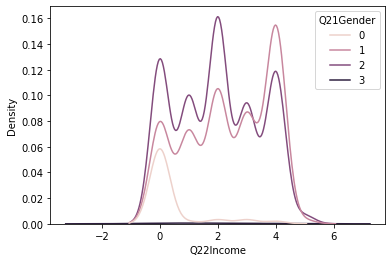

In [23]:
sns.kdeplot(data_2018['Q22Income'], hue = data_2018['Q21Gender'])

<AxesSubplot:xlabel='Q7WIFI', ylabel='Density'>

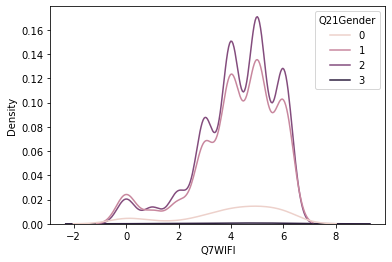

In [24]:
sns.kdeplot(data_2018['Q7WIFI'], hue = data_2018['Q21Gender'])

## Prepare data

In [25]:
# Select columns
data_2018_numeric_nn = data_2018_numeric[columns_numeric_nn]
data_2018_numeric_nn.head()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9AirTrain,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT
0,29,1680,2,7,4,27,80,102,15,255.0,...,6,3,4,6,6,4,1842,2,3,0.670484
1,29,1681,2,7,4,27,80,102,15,315.0,...,4,4,5,6,3,4,1844,2,3,0.670484
2,29,1678,2,7,4,27,80,102,15,165.0,...,6,3,4,6,6,2,1840,1,3,0.670484
3,29,1676,2,7,4,27,80,102,15,225.0,...,0,4,5,3,0,4,1837,1,3,0.670484
4,29,1674,2,7,4,27,80,102,15,175.0,...,6,5,5,4,6,5,1833,2,3,0.670484


In [26]:
len(data_2018_numeric_nn.columns)

66

In [27]:
print(data_2018_numeric_nn.isnull().sum().to_markdown())

|              |   0 |
|:-------------|----:|
| AIRLINE_CODE |   0 |
| CCGID        |   0 |
| DAY          |   0 |
| DESTGEO      |   0 |
| DESTMARK     |   0 |
| DEST_CODE    |   0 |
| FLIGHT       |   0 |
| GATE         |   0 |
| HOME         |   0 |
| HOWLONG      |   0 |
| INTDATE      |   0 |
| LANG         |   0 |
| METH         |   0 |
| NETPRO       |   0 |
| PEAK         |   0 |
| Q10-1        |   0 |
| Q10Safe      |   0 |
| Q11TSAPRE    |   0 |
| Q13COUNTY    |   0 |
| Q13GETRATE   |   0 |
| Q14FIND      |   0 |
| Q14PASSTHRU  |   0 |
| Q15PROBLEM   |   0 |
| Q17LIVE      |   0 |
| Q19Clear     |   0 |
| Q20Age       |   0 |
| Q21Gender    |   0 |
| Q22Income    |   0 |
| Q23FLY       |   0 |
| Q24OAK       |   0 |
| Q24SJC       |   0 |
| Q2PURP1      |   0 |
| Q3GETTO1     |   0 |
| Q4BAGS       |   0 |
| Q4FOOD       |   0 |
| Q4STORE      |   0 |
| Q4WIFI       |   0 |
| Q5FIRSTTIME  |   0 |
| Q5TIMESFLOWN |   0 |
| Q6LONGUSE    |   0 |
| Q7AIRTRAIN   |   0 |
| Q7ART    

In [28]:
# data_2018_numeric_nn = data_2018_numeric_nn.loc[data_2018_numeric_nn['NETPRO'] != 11]
# columns_q_0 = [con for con in data_2018_numeric_nn.columns if con in columns_0]
# for con in columns_q_0:
#     data_2018_numeric_nn = data_2018_numeric_nn.loc[data_2018_numeric_nn[con] != 0]
# len(data_2018_numeric_nn)
# # results - 391

In [29]:
data_weight = data_2018_numeric_nn.merge(data_2018, how = 'left')
data_weight.head()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q12-3,Q15A,Q15-1,Q15-2,Q15-3,Q18CITY,Q18COUNTY,Q18STATE,Q18ZIP,Q18COUNTRY
0,29,1680,2,7,4,27,80,102,15,255.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CYPRUS
1,29,1681,2,7,4,27,80,102,15,315.0,...,NaN,NaN,NaN,NaN,NaN,ISTANBUL,NaN,NaN,NaN,TURKEY
2,29,1678,2,7,4,27,80,102,15,165.0,...,NaN,NaN,NaN,NaN,NaN,IZMIR,NaN,NaN,NaN,TURKEY
3,29,1676,2,7,4,27,80,102,15,225.0,...,NaN,NaN,NaN,NaN,NaN,SKOPJE,NaN,NaN,NaN,MACEDONIA
4,29,1674,2,7,4,27,80,102,15,175.0,...,NaN,I FLEW WITH TK A NUMBER OF TIMES AND NEVER ENC...,31.0,NaN,NaN,REUTLINGEN,NaN,NaN,NaN,GERMANY


## Elbow function

In [30]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    #Generate elbow plot
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

    # return clusters_centers, k_values

## Standardised data

In [31]:
scaler = StandardScaler()
scaler.fit(data_2018_numeric_nn)
scaled_data = scaler.transform(data_2018_numeric_nn)
scaled_data

array([[ 0.96027516,  0.30298323, -1.2568419 , ...,  0.36860191,
         1.0911016 , -0.67126126],
       [ 0.96027516,  0.30414437, -1.2568419 , ...,  0.36860191,
         1.0911016 , -0.67126126],
       [ 0.96027516,  0.30066093, -1.2568419 , ..., -2.71295393,
         1.0911016 , -0.67126126],
       ...,
       [ 1.05624118,  8.80489925,  1.697031  , ...,  0.36860191,
        -0.1896775 ,  0.99192646],
       [-1.53484139,  8.80722155,  1.10625642, ...,  0.36860191,
         1.0911016 , -1.33202975],
       [-1.15097731,  8.8060604 , -0.66606732, ...,  0.36860191,
         1.0911016 ,  0.21661355]])

## KMeans

### Elbow plot

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\

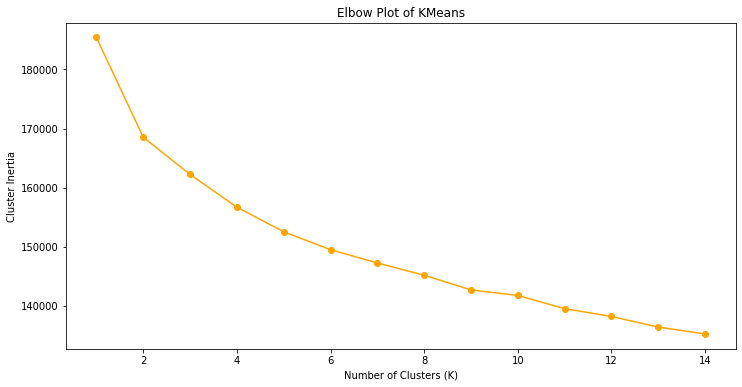

In [32]:
find_best_clusters(scaled_data, 15)

### Dendrogram

In [33]:
# Method - Ward
# clusters = hierarchy.linkage(scaled_data, method="ward")
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters)

### First trial of k-means on quantitative data

In [34]:
kmeans_model = KMeans(n_clusters = 3, random_state=300)

kmeans_model.fit(scaled_data, sample_weight=data_weight['WEIGHT'])

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=300)

In [35]:
data_2018_numeric_nn['clusters'] = kmeans_model.labels_

data_2018_numeric_nn.head()

<ipython-input-35-f2e263077c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_numeric_nn['clusters'] = kmeans_model.labels_


,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters
0,29,1680,2,7,4,27,80,102,15,255.0,...,3,4,6,6,4,1842,2,3,0.670484,0
1,29,1681,2,7,4,27,80,102,15,315.0,...,4,5,6,3,4,1844,2,3,0.670484,0
2,29,1678,2,7,4,27,80,102,15,165.0,...,3,4,6,6,2,1840,1,3,0.670484,0
3,29,1676,2,7,4,27,80,102,15,225.0,...,4,5,3,0,4,1837,1,3,0.670484,2
4,29,1674,2,7,4,27,80,102,15,175.0,...,5,5,4,6,5,1833,2,3,0.670484,2


In [36]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters'] == 0].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,...,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.0
mean,19.479663,1397.274194,4.041374,3.319074,3.203366,36.291725,1432.415849,53.849930,15.092567,164.752454,...,4.450210,4.593969,4.915849,5.580645,4.406732,1817.650771,1.798738,2.110799,1.042609,0.0
std,10.513080,873.599761,1.722210,2.503867,1.077692,19.125635,1729.956578,32.500061,19.933112,102.981993,...,0.720119,0.694797,0.968957,0.862972,0.939614,935.202363,0.401084,0.794054,0.511937,0.0
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.208038,0.0
25%,8.000000,619.250000,3.000000,1.000000,2.000000,23.000000,420.500000,24.000000,10.000000,105.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,1071.750000,2.000000,1.000000,0.670484,0.0
50%,22.000000,1388.500000,4.000000,2.000000,4.000000,34.000000,873.000000,54.000000,11.000000,150.000000,...,5.000000,5.000000,5.000000,6.000000,5.000000,1841.500000,2.000000,2.000000,1.106332,0.0
75%,30.000000,2093.250000,5.000000,6.000000,4.000000,50.000000,1703.000000,81.000000,13.000000,194.750000,...,5.000000,5.000000,6.000000,6.000000,5.000000,2584.000000,2.000000,3.000000,1.486925,0.0
max,33.000000,9004.000000,7.000000,9.000000,4.000000,73.000000,8839.000000,102.000000,99.000000,1210.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,9004.000000,2.000000,3.000000,3.887528,0.0


In [37]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters'] == 1].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,...,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.0
mean,18.058723,1459.441702,4.247660,3.382979,3.239149,38.028085,1434.959149,46.269787,18.274043,160.228936,...,3.806809,3.980426,3.883404,4.581277,3.657021,1838.828936,1.964255,2.193191,0.932115,1.0
std,10.264349,847.523844,1.656882,2.542594,1.058670,19.232817,1730.243084,33.354575,27.484358,116.514753,...,0.847456,0.868015,1.227533,1.595882,1.012183,960.151208,0.185732,0.770598,0.436835,0.0
min,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.208038,1.0
25%,7.000000,802.500000,3.000000,1.000000,2.000000,23.000000,385.000000,10.000000,6.000000,103.000000,...,3.000000,3.000000,3.000000,4.000000,3.000000,1026.500000,2.000000,2.000000,0.670484,1.0
50%,17.000000,1435.000000,4.000000,2.000000,4.000000,38.000000,841.000000,46.000000,10.000000,135.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,1925.000000,2.000000,2.000000,0.994275,1.0
75%,29.000000,2152.000000,5.000000,6.000000,4.000000,53.000000,1798.000000,73.000000,13.000000,180.000000,...,4.000000,5.000000,5.000000,6.000000,4.000000,2630.500000,2.000000,3.000000,1.178946,1.0
max,33.000000,9003.000000,7.000000,9.000000,4.000000,73.000000,8839.000000,102.000000,99.000000,1365.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,9003.000000,2.000000,3.000000,3.887528,1.0


In [38]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters'] == 2].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.0
mean,20.942308,1340.375000,4.038462,3.673077,3.250000,36.307692,1182.331731,53.418269,44.596154,188.466346,...,2.567308,2.836538,1.846154,1.341346,2.471154,1755.908654,1.966346,2.149038,1.091352,2.0
std,10.231926,847.662369,1.658957,2.734437,1.060945,20.020075,1502.579402,34.941954,42.635070,183.631454,...,2.046628,2.055325,2.113994,2.076745,2.002205,893.630724,0.180772,0.736816,0.580104,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.208038,2.0
25%,11.000000,571.500000,3.000000,1.000000,2.000000,20.000000,284.000000,11.000000,10.000000,103.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,954.750000,2.000000,2.000000,0.670484,2.0
50%,25.500000,1293.000000,4.000000,3.000000,4.000000,34.000000,754.000000,57.000000,15.000000,150.000000,...,3.000000,4.000000,0.000000,0.000000,3.000000,1717.500000,2.000000,2.000000,1.106332,2.0
75%,30.000000,2090.250000,5.000000,6.000000,4.000000,54.250000,1447.250000,87.000000,99.000000,225.000000,...,4.000000,5.000000,4.000000,3.000000,4.000000,2515.750000,2.000000,3.000000,1.486925,2.0
max,33.000000,2782.000000,7.000000,9.000000,4.000000,72.000000,8839.000000,102.000000,99.000000,1395.000000,...,5.000000,5.000000,6.000000,6.000000,6.000000,3280.000000,2.000000,3.000000,3.887528,2.0


c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HOME', ylabel='Density'>

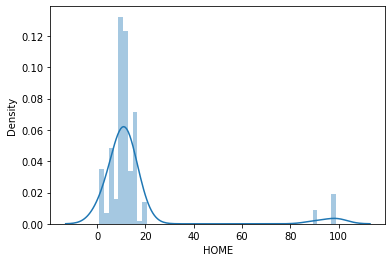

In [39]:
plt.figure()
sns.distplot(data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters'] == 0].HOME)

<AxesSubplot:xlabel='STRATA', ylabel='Density'>

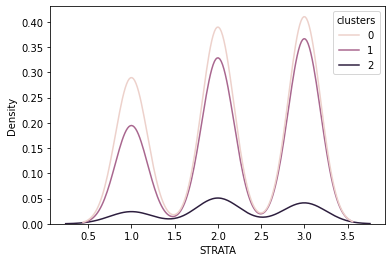

In [40]:
sns.kdeplot(data_2018_numeric_nn['STRATA'], hue = data_2018_numeric_nn['clusters'])

In [41]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters'] == 2].groupby('Q5TIMESFLOWN')['Q5TIMESFLOWN'].count()

Q5TIMESFLOWN
0    13
1    77
2    45
3    39
4    12
5    13
6     9
Name: Q5TIMESFLOWN, dtype: int64

In [42]:
a = data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters'] == 2].Q9All
a = a[a > 0]
np.mean(a[a < 6])

3.985074626865672

### Second trail of k-means with weight - 4 clusters

In [43]:
kmeans_model = KMeans(n_clusters = 4)

kmeans_model.fit(scaled_data, sample_weight=data_weight['WEIGHT'])

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [44]:
data_2018_numeric_nn['clusters_4'] = kmeans_model.labels_

data_2018_numeric_nn.head()

<ipython-input-44-8c47b68d6182>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_numeric_nn['clusters_4'] = kmeans_model.labels_


,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4
0,29,1680,2,7,4,27,80,102,15,255.0,...,4,6,6,4,1842,2,3,0.670484,0,0
1,29,1681,2,7,4,27,80,102,15,315.0,...,5,6,3,4,1844,2,3,0.670484,0,0
2,29,1678,2,7,4,27,80,102,15,165.0,...,4,6,6,2,1840,1,3,0.670484,0,0
3,29,1676,2,7,4,27,80,102,15,225.0,...,5,3,0,4,1837,1,3,0.670484,2,2
4,29,1674,2,7,4,27,80,102,15,175.0,...,5,4,6,5,1833,2,3,0.670484,2,2


In [45]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_4'] == 0].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,...,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.0
mean,19.362794,1390.738418,4.032074,3.404847,3.208125,36.418389,1415.567356,53.564505,14.040627,165.880969,...,4.590877,4.906629,5.581611,4.406985,1820.995011,1.803991,2.133999,1.029841,0.024947,0.0
std,10.494423,870.341591,1.720390,2.535911,1.074682,19.133464,1728.196852,32.881329,17.547138,102.963676,...,0.693954,0.994553,0.861858,0.945223,932.241468,0.397117,0.789919,0.509847,0.156018,0.0
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.208038,0.000000,0.0
25%,8.000000,631.000000,3.000000,1.000000,2.000000,23.000000,412.000000,24.000000,10.000000,107.000000,...,4.000000,4.000000,5.000000,4.000000,1083.000000,2.000000,1.000000,0.670484,0.000000,0.0
50%,22.000000,1381.000000,4.000000,2.000000,4.000000,34.000000,869.000000,54.000000,11.000000,150.000000,...,5.000000,5.000000,6.000000,5.000000,1835.000000,2.000000,2.000000,1.106332,0.000000,0.0
75%,30.000000,2072.500000,5.000000,6.000000,4.000000,50.000000,1680.000000,83.000000,13.000000,195.000000,...,5.000000,6.000000,6.000000,5.000000,2590.500000,2.000000,3.000000,1.486925,0.000000,0.0
max,33.000000,9004.000000,7.000000,9.000000,4.000000,73.000000,8839.000000,102.000000,99.000000,1210.000000,...,6.000000,6.000000,6.000000,6.000000,9004.000000,2.000000,3.000000,3.887528,1.000000,0.0


In [46]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_4'] == 1].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0
mean,19.069231,1450.184615,4.130769,3.669231,3.400000,39.853846,1329.876923,48.538462,91.984615,176.115385,...,3.861538,3.892308,4.123077,3.600000,1886.538462,1.938462,2.200000,1.077213,1.092308,1.0
std,10.656140,1023.334864,1.709021,2.807488,0.969296,19.465777,1599.007483,33.812331,22.962384,167.364090,...,1.503246,1.739848,2.163887,1.587744,1098.193867,0.241245,0.781571,0.586525,0.675670,0.0
min,1.000000,8.000000,1.000000,1.000000,1.000000,2.000000,7.000000,2.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,208.000000,1.000000,1.000000,0.208038,0.000000,1.0
25%,7.000000,676.500000,3.000000,1.000000,2.000000,27.000000,327.250000,9.000000,99.000000,100.000000,...,3.000000,3.000000,3.000000,3.000000,1156.500000,2.000000,2.000000,0.670484,1.000000,1.0
50%,19.000000,1482.500000,4.000000,3.000000,4.000000,36.000000,754.000000,52.500000,99.000000,137.500000,...,4.000000,4.000000,5.000000,4.000000,1870.500000,2.000000,2.000000,1.106332,1.000000,1.0
75%,30.000000,2028.250000,5.000000,6.000000,4.000000,57.000000,1747.000000,73.000000,99.000000,195.000000,...,5.000000,5.000000,6.000000,5.000000,2665.500000,2.000000,3.000000,1.486925,2.000000,1.0
max,33.000000,9003.000000,7.000000,9.000000,4.000000,73.000000,6025.000000,102.000000,99.000000,1395.000000,...,6.000000,6.000000,6.000000,6.000000,9003.000000,2.000000,3.000000,3.887528,2.000000,1.0


In [47]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_4'] == 2].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,168.0
mean,20.958333,1376.779762,4.047619,3.755952,3.226190,35.065476,1163.791667,53.345238,33.285714,176.952381,...,2.916667,1.654762,1.184524,2.428571,1790.065476,1.964286,2.172619,1.052504,2.0,2.0
std,10.238681,849.878487,1.658979,2.739153,1.070578,20.293104,1551.030995,35.536940,38.110011,155.282197,...,2.080467,2.082111,1.998922,2.010664,906.498218,0.186132,0.717589,0.537922,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.208038,2.0,2.0
25%,11.000000,620.250000,3.000000,1.000000,2.000000,17.000000,257.500000,10.500000,10.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,972.750000,2.000000,2.000000,0.670484,2.0,2.0
50%,24.500000,1293.000000,4.000000,3.000000,4.000000,32.500000,747.000000,57.500000,12.000000,150.000000,...,4.000000,0.000000,0.000000,3.000000,1872.000000,2.000000,2.000000,1.106332,2.0,2.0
75%,30.000000,2143.250000,5.000000,6.000000,4.000000,53.000000,1273.000000,87.250000,90.000000,222.750000,...,5.000000,4.000000,3.000000,4.000000,2525.500000,2.000000,3.000000,1.486925,2.0,2.0
max,33.000000,2782.000000,7.000000,9.000000,4.000000,72.000000,8839.000000,102.000000,99.000000,953.000000,...,5.000000,6.000000,6.000000,6.000000,3280.000000,2.000000,3.000000,3.887528,2.0,2.0


In [48]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_4'] == 3].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.0
mean,18.219314,1457.694946,4.259928,3.237365,3.217509,37.743682,1462.260830,46.791516,13.556859,159.795126,...,3.957581,3.870939,4.561372,3.642599,1820.384477,1.957581,2.156137,0.945191,0.972924,3.0
std,10.278230,829.937329,1.654192,2.469429,1.070496,19.171013,1733.335944,32.901414,20.198192,118.699808,...,0.876784,1.206181,1.609824,0.991595,942.433073,0.201634,0.779125,0.439607,0.183285,0.0
min,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.208038,0.000000,3.0
25%,7.000000,799.500000,3.000000,1.000000,2.000000,23.000000,412.000000,11.000000,5.000000,101.000000,...,3.000000,3.000000,4.000000,3.000000,1011.500000,2.000000,2.000000,0.670484,1.000000,3.0
50%,19.000000,1430.500000,4.000000,2.000000,4.000000,36.500000,857.000000,48.000000,10.000000,133.000000,...,4.000000,4.000000,5.000000,4.000000,1923.500000,2.000000,2.000000,1.061139,1.000000,3.0
75%,30.000000,2179.750000,5.000000,6.000000,4.000000,53.000000,1799.000000,73.000000,12.000000,180.000000,...,5.000000,4.000000,6.000000,4.000000,2603.000000,2.000000,3.000000,1.178946,1.000000,3.0
max,33.000000,9001.000000,7.000000,9.000000,4.000000,73.000000,8839.000000,102.000000,99.000000,1365.000000,...,6.000000,6.000000,6.000000,6.000000,9001.000000,2.000000,3.000000,3.887528,2.000000,3.0


## Decision Tree

In [49]:
col_feature = list(data_2018_numeric_nn.drop(columns=['clusters', 'clusters_4', 'WEIGHT']).columns)

In [50]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_2018_numeric_nn[col_feature],
                                                    data_2018_numeric_nn.clusters, test_size=0.3, random_state=1)
# 70% training and 30% test

In [51]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8090154211150652


In [53]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\\bin'

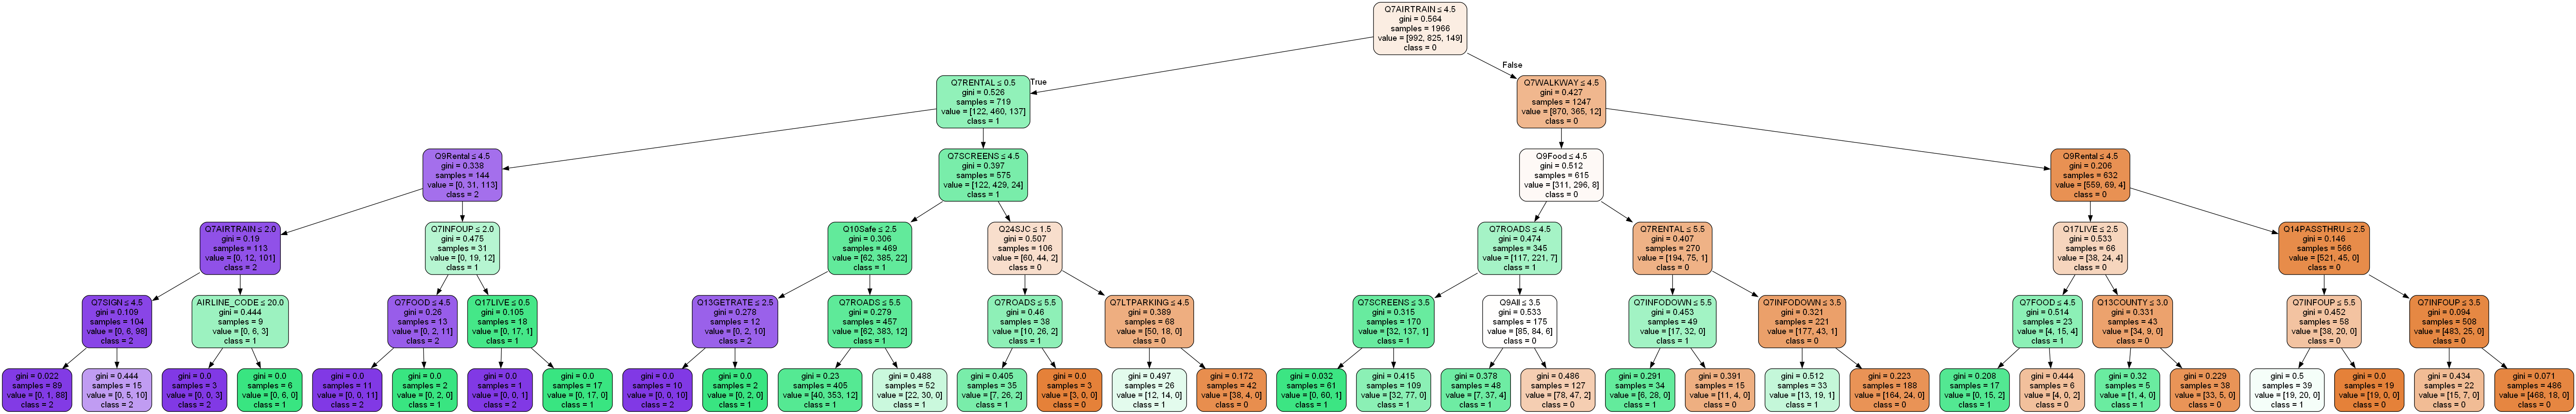

In [54]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = col_feature,
                class_names=['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('sfo_customers.png')
Image(graph.create_png())

In [55]:
text_representation = tree.export_text(clf, feature_names=col_feature)
print(text_representation)

|--- Q7AIRTRAIN <= 4.50
|   |--- Q7RENTAL <= 0.50
|   |   |--- Q9Rental <= 4.50
|   |   |   |--- Q7AIRTRAIN <= 2.00
|   |   |   |   |--- Q7SIGN <= 4.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Q7SIGN >  4.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- Q7AIRTRAIN >  2.00
|   |   |   |   |--- AIRLINE_CODE <= 20.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- AIRLINE_CODE >  20.00
|   |   |   |   |   |--- class: 1
|   |   |--- Q9Rental >  4.50
|   |   |   |--- Q7INFOUP <= 2.00
|   |   |   |   |--- Q7FOOD <= 4.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Q7FOOD >  4.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Q7INFOUP >  2.00
|   |   |   |   |--- Q17LIVE <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Q17LIVE >  0.50
|   |   |   |   |   |--- class: 1
|   |--- Q7RENTAL >  0.50
|   |   |--- Q7SCREENS <= 4.50
|   |   |   |--- Q10Safe <= 2.50
|   |   |   |   |--- Q13GETRATE <= 2.50
|   |   |   |   |   |--- class: 2
|   |   | 

In [56]:
def used_feature(tree, feature_names):
    feature = []
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            feature.append(name)
            recurse(tree_.children_left[node], depth + 1)
            recurse(tree_.children_right[node], depth + 1)

    recurse(0, 1)
    return feature

In [57]:
key_feature = pd.unique(used_feature(clf, col_feature))
key_feature

array(['Q7AIRTRAIN', 'Q7RENTAL', 'Q9Rental', 'Q7SIGN', 'AIRLINE_CODE',
       'Q7INFOUP', 'Q7FOOD', 'Q17LIVE', 'Q7SCREENS', 'Q10Safe',
       'Q13GETRATE', 'Q7ROADS', 'Q24SJC', 'Q7LTPARKING', 'Q7WALKWAY',
       'Q9Food', 'Q9All', 'Q7INFODOWN', 'Q13COUNTY', 'Q14PASSTHRU'],
      dtype=object)

## K-means with key features

In [58]:
scaler = StandardScaler()
scaler.fit(data_2018_numeric_nn[key_feature])
scaled_data_tree = scaler.transform(data_2018_numeric_nn[key_feature])
scaled_data_tree

array([[ 0.77900199,  0.65180888,  0.66773288, ..., -0.32343613,
         2.24647435, -0.56550505],
       [-0.37603448, -1.52722253, -1.072213  , ...,  0.90348093,
        -0.31198697, -0.56550505],
       [ 0.77900199,  0.65180888,  0.66773288, ..., -0.93689465,
        -1.29601056, -0.56550505],
       ...,
       [ 0.77900199,  0.65180888,  0.66773288, ...,  0.90348093,
        -0.90240113,  0.05621851],
       [ 0.20148375,  0.65180888,  0.66773288, ...,  0.90348093,
        -0.70559641,  0.67794206],
       [ 0.77900199,  0.65180888, -1.072213  , ..., -0.32343613,
        -0.31198697, -2.43067571]])

In [59]:
kmeans_model = KMeans(n_clusters=3, random_state=300)
kmeans_model.fit(scaled_data_tree, sample_weight=data_weight['WEIGHT'])

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=300)

In [60]:
data_2018_numeric_nn['clusters_tree'] = kmeans_model.labels_
data_2018_numeric_nn.head()

<ipython-input-60-8440c86a48d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_numeric_nn['clusters_tree'] = kmeans_model.labels_


,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4,clusters_tree
0,29,1680,2,7,4,27,80,102,15,255.0,...,6,6,4,1842,2,3,0.670484,0,0,2
1,29,1681,2,7,4,27,80,102,15,315.0,...,6,3,4,1844,2,3,0.670484,0,0,2
2,29,1678,2,7,4,27,80,102,15,165.0,...,6,6,2,1840,1,3,0.670484,0,0,2
3,29,1676,2,7,4,27,80,102,15,225.0,...,3,0,4,1837,1,3,0.670484,2,2,1
4,29,1674,2,7,4,27,80,102,15,175.0,...,4,6,5,1833,2,3,0.670484,2,2,1


In [61]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_tree'] == 0].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4,clusters_tree
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,...,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.0
mean,17.968442,1428.595661,4.236686,3.452663,3.284024,38.147929,1430.798817,46.911243,20.982249,167.679487,...,3.744576,4.316568,3.624260,1819.356016,1.962525,2.185404,0.943354,0.985207,2.634122,0.0
std,10.225541,862.005194,1.655764,2.562781,1.032637,19.206002,1737.205063,33.692999,30.368414,130.308847,...,1.312423,1.735576,1.087415,956.187518,0.190017,0.774179,0.478501,0.302634,0.878199,0.0
min,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.208038,0.000000,0.000000,0.0
25%,7.000000,759.750000,3.000000,1.000000,2.000000,23.000000,385.000000,10.000000,6.000000,105.000000,...,3.000000,3.000000,3.000000,1028.500000,2.000000,2.000000,0.670484,1.000000,3.000000,0.0
50%,17.000000,1404.500000,4.000000,2.000000,4.000000,38.000000,821.000000,47.000000,10.000000,136.000000,...,4.000000,4.000000,4.000000,1892.000000,2.000000,2.000000,0.994275,1.000000,3.000000,0.0
75%,29.000000,2121.750000,5.000000,6.000000,4.000000,53.000000,1760.500000,74.000000,15.000000,185.000000,...,4.000000,6.000000,4.000000,2595.250000,2.000000,3.000000,1.178946,1.000000,3.000000,0.0
max,33.000000,9003.000000,7.000000,9.000000,4.000000,73.000000,8839.000000,102.000000,99.000000,1395.000000,...,6.000000,6.000000,6.000000,9003.000000,2.000000,3.000000,3.887528,2.000000,3.000000,0.0


In [62]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_tree'] == 1].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4,clusters_tree
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0
mean,20.842697,1404.106742,4.033708,3.578652,3.162921,34.921348,1198.297753,52.449438,34.511236,180.853933,...,1.758427,1.348315,2.500000,1807.837079,1.960674,2.146067,1.066657,1.949438,2.033708,1.0
std,10.161853,843.249630,1.687103,2.694836,1.089952,20.397587,1518.948378,34.598100,39.007060,160.511685,...,2.110791,2.131820,1.986537,918.414595,0.194917,0.729531,0.522924,0.219719,0.317100,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.208038,1.000000,1.000000,1.0
25%,11.000000,648.250000,3.000000,1.000000,2.000000,14.750000,272.000000,11.000000,10.000000,105.000000,...,0.000000,0.000000,0.000000,964.250000,2.000000,2.000000,0.670484,2.000000,2.000000,1.0
50%,24.000000,1385.500000,4.000000,2.000000,4.000000,34.000000,750.000000,57.000000,12.000000,149.000000,...,0.000000,0.000000,3.000000,1910.500000,2.000000,2.000000,1.106332,2.000000,2.000000,1.0
75%,30.000000,2171.000000,5.000000,6.000000,4.000000,53.000000,1454.000000,85.000000,90.000000,219.250000,...,4.000000,3.000000,4.000000,2547.750000,2.000000,3.000000,1.486925,2.000000,2.000000,1.0
max,33.000000,2782.000000,7.000000,9.000000,4.000000,72.000000,8839.000000,102.000000,99.000000,953.000000,...,6.000000,6.000000,6.000000,3280.000000,2.000000,3.000000,3.887528,2.000000,3.000000,1.0


In [63]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_tree'] == 2].describe()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA,WEIGHT,clusters,clusters_4,clusters_tree
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,...,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.0
mean,19.432900,1414.735931,4.069264,3.298701,3.189239,36.542362,1428.880643,52.791589,15.368584,160.907854,...,4.852814,5.567718,4.313544,1825.108844,1.820037,2.124923,1.028182,0.151515,0.468151,2.0
std,10.519518,863.409543,1.714138,2.504047,1.086623,19.120277,1720.655984,32.612399,21.053361,100.529075,...,0.975875,0.858430,0.980009,937.280329,0.384275,0.790086,0.492029,0.358661,1.069552,0.0
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.208038,0.000000,0.000000,2.0
25%,8.000000,669.000000,3.000000,1.000000,2.000000,23.000000,416.000000,23.000000,9.000000,105.000000,...,4.000000,5.000000,4.000000,1071.000000,2.000000,1.000000,0.670484,0.000000,0.000000,2.0
50%,22.000000,1410.000000,4.000000,2.000000,4.000000,34.000000,873.000000,54.000000,11.000000,145.000000,...,5.000000,6.000000,4.000000,1856.000000,2.000000,2.000000,1.106332,0.000000,0.000000,2.0
75%,30.000000,2108.000000,5.000000,6.000000,4.000000,50.000000,1703.000000,81.000000,13.000000,185.000000,...,6.000000,6.000000,5.000000,2596.000000,2.000000,3.000000,1.486925,0.000000,0.000000,2.0
max,33.000000,9004.000000,7.000000,9.000000,4.000000,73.000000,8839.000000,102.000000,99.000000,1210.000000,...,6.000000,6.000000,6.000000,9004.000000,2.000000,3.000000,3.887528,1.000000,3.000000,2.0


In [64]:
data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_tree'] == 1].groupby('Q13COUNTY')['Q13COUNTY'].count()

Q13COUNTY
0     43
1     13
2      8
3      3
4      3
5     34
6      7
7      8
8      1
9      3
10     1
11    50
19     1
27     1
29     1
30     1
Name: Q13COUNTY, dtype: int64

<AxesSubplot:xlabel='Q13COUNTY', ylabel='Density'>

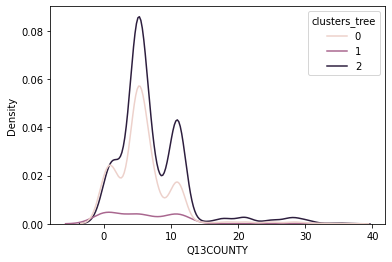

In [65]:
sns.kdeplot(data_2018_numeric_nn['Q13COUNTY'], hue = data_2018_numeric_nn['clusters_tree'])

In [66]:
a = data_2018_numeric_nn.loc[data_2018_numeric_nn['clusters_tree'] == 2].Q10Safe
a = a[a > 0]
np.mean(a[a < 6])

4.556246115599752